## MFDFA of PSP Sub and Super Alfvenic Intervals

In [3]:
# First we need to import the necessary libraries. 
# Pyspedas handles loading the data, while MFDFA handles fluctuation function calculation
import pyspedas
import matplotlib.pyplot as plt
import numpy as np
from pytplot import tplot
import MFDFAlib

ModuleNotFoundError: No module named 'MFDFAlib'

### Loading the Sub-Alfvenic and Super-Alfvenic Regions: 

11-Mar-25 00:08:30: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn/2021/
11-Mar-25 00:08:30: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021042806_v02.cdf
11-Mar-25 00:08:31: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021042812_v02.cdf
11-Mar-25 00:08:38: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn/2021/
11-Mar-25 00:08:38: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021042806_v02.cdf
11-Mar-25 00:08:39: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021042812_v02.cdf
11-Mar-25 00:08:55: /home/scoscia/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(



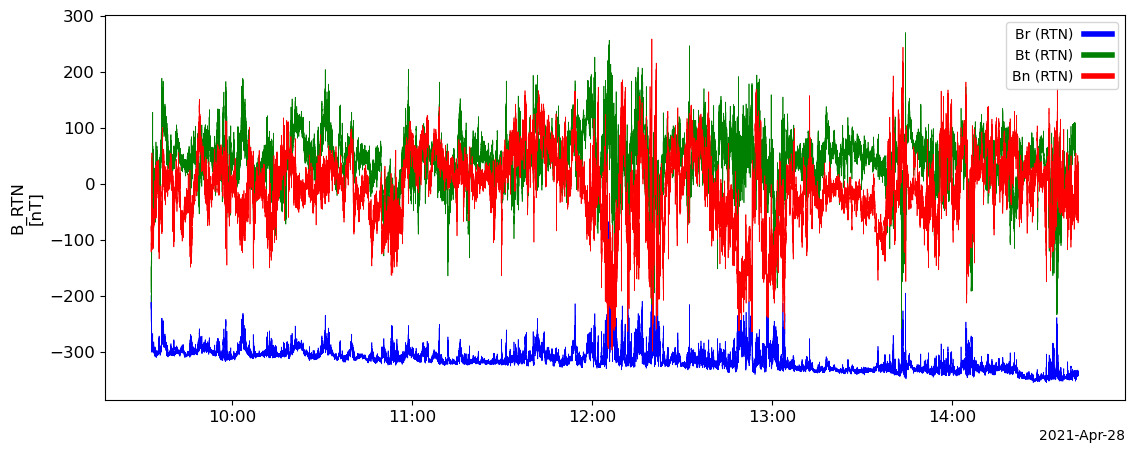

11-Mar-25 00:08:56: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn/2021/
11-Mar-25 00:08:57: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021042800_v02.cdf
11-Mar-25 00:08:57: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021042806_v02.cdf
11-Mar-25 00:09:04: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn/2021/
11-Mar-25 00:09:05: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021042800_v02.cdf
11-Mar-25 00:09:05: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021042806_v02.cdf


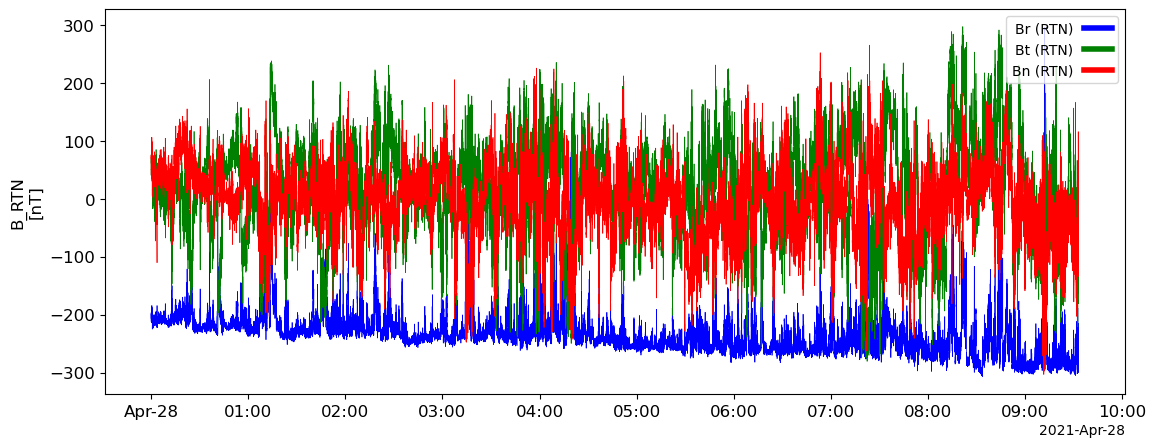

In [3]:
# First let's load the sub-Alfvenic time range
# Ranges taken from https://arxiv.org/pdf/2201.10718 Section 3
subAlfTimeRange = ['2021-4-28/09:33','2021-4-28/14:42']

# Here we set the environment variable for the specified time range of the PSP data:
fields_vars = pyspedas.projects.psp.fields(trange=subAlfTimeRange, datatype='mag_rtn', level='l2', time_clip=True)

# Here we extract the RTN coordinate B-field data for PSP:
b_rtn_subAlf = pyspedas.get_data("psp_fld_l2_mag_RTN")

# Here we calculate the magnitude of the B-field data: 
bmag_sub = MFDFAlib.magnitude(b_rtn_subAlf.y)

# Here we plot the data to make sure everything looks proper
tplot('psp_fld_l2_mag_RTN')

# Finally, we perform the multifractal analysis using the MFDFA library:
# This will give us the Renyi spectrum, Hurst spectrum, fluctuation function, and singularity spectrum
# MFDFA = MFDFAlib.MFDFA_analysis(bmag_sub)

# Now let's choose the corresponding super-Alfvenic time range
superAlfTimeRange = ['2021-4-28/00:00','2021-4-28/09:33']

# Here we set the environment variable for the specified time range of the PSP data:
fields_vars = pyspedas.projects.psp.fields(trange=superAlfTimeRange, datatype='mag_rtn', level='l2', time_clip=True)

# Here we extract the RTN coordinate B-field data for PSP:
b_rtn_superAlf = pyspedas.get_data("psp_fld_l2_mag_RTN")

# Here we calculate the magnitude of the B-field data: 
bmag_super = MFDFAlib.magnitude(b_rtn_superAlf.y)

# Here we plot the data to make sure everything looks proper
tplot('psp_fld_l2_mag_RTN')

sub_label = 'Sub-Alfvenic Interval (April 28th, 2021 from 09:33-14:42 UTC)'
super_label = 'Super-Alfvenic Interval (April 28th, 2021 from 00:00-09:33 UTC)'

# Finally, we perform the multifractal analysis using the MFDFA library:
# This will give us the Renyi spectrum, Hurst spectrum, fluctuation function, and singularity spectrum
# MFDFAb = MFDFAlib.MFDFA_analysis(bmag_sub, bmag_super, sub_label, super_label)

#### Initiating Lags and q Powers 

In [4]:
# We first need to select a band of lags, varying from small segments of data to long ones:
# These bands must be integers, since they will segment the data into chunks of side length s:
lag1 = np.arange(1,len(bmag_sub),1000)
lag2 = np.arange(1,len(bmag_super),1000)
# We need to select a range of powers for the fluctuation function.
# Gomes et al. do -20 to 20 with increments of 0.25
qList=np.arange(-20,20,0.25).tolist()
qList.remove(0)

#The order for the polynomial fitting is chosen by Gomes et al. as 3:
order=3


#### Fluctuation Function

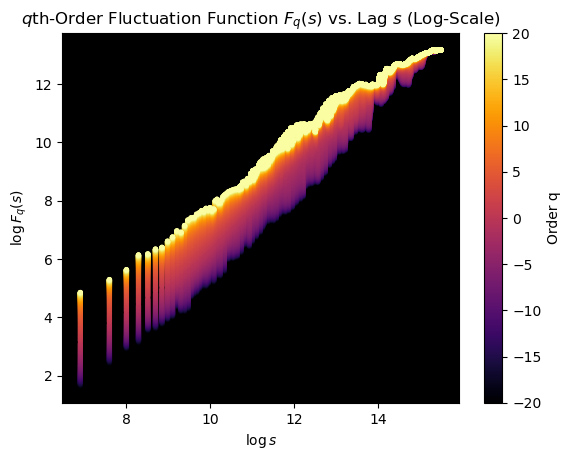

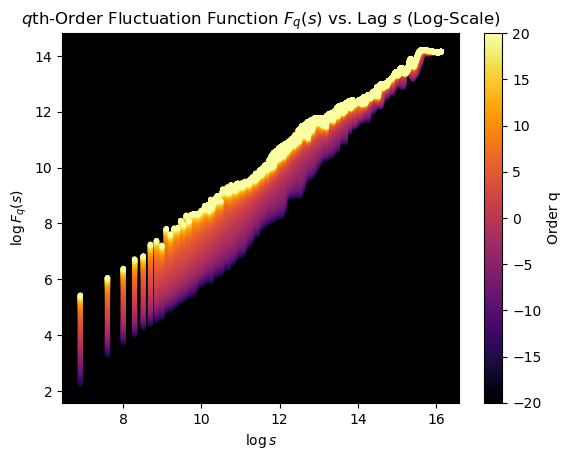

In [4]:
# Find the fluctuation function:
lag1,dfaList1 = MFDFAlib.flucFunc(bmag_sub,lag1,qList,order)
lag2,dfaList2 = MFDFAlib.flucFunc(bmag_super,lag2,qList,order)


#### Hurst Parameter Spectrum

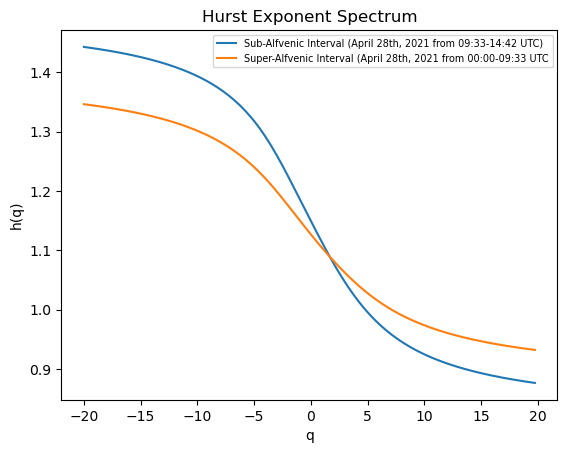

In [ ]:
"""
 Hurst parameter spectra from each fluctuation function:
 Note : hList takes in the transpose of the fluctuation matrix,
 which is of the form: [[F_q1(s1),F_q1(s2), ...], [F_q2(s1),F_q2(s2), ...]]
 for the purpose of easily parsing the data  
"""
h1=MFDFAlib.hList(lag1,dfaList1.T)
h2=MFDFAlib.hList(lag2,dfaList2.T)
########PLOTTING#################
plt.plot(qList,h1,label="Sub-Alfvenic Interval (April 28th, 2021 from 09:33-14:42 UTC)")
plt.plot(qList,h2,label="Super-Alfvenic Interval (April 28th, 2021 from 00:00-09:33 UTC")
plt.ylabel('h(q)')
plt.xlabel('q')
plt.legend(fontsize = 'x-small')
plt.title('Hurst Exponent Spectrum')
plt.show()
#################################

#### Renyi Exponent Spectrum

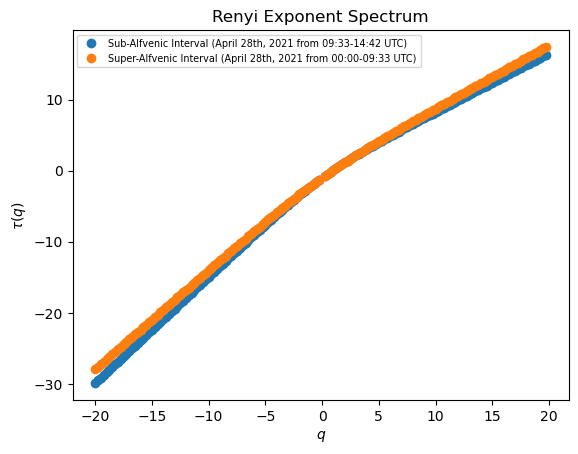

In [14]:
# Now find and plot the Renyi exponent spectrum from the Hurst spectrum:
tauFunc1=MFDFAlib.renyiExp(qList,h1)
tauFunc2=MFDFAlib.renyiExp(qList,h2)
########PLOTTING#################
plt.plot(qList,tauFunc1,'o',label = 'Sub-Alfvenic Interval (April 28th, 2021 from 09:33-14:42 UTC)')
plt.plot(qList,tauFunc2,'o', label = 'Super-Alfvenic Interval (April 28th, 2021 from 00:00-09:33 UTC)')
plt.xlabel(r'$q$')
plt.ylabel(r'$\tau(q)$')
plt.legend(fontsize = 'x-small')
plt.title('Renyi Exponent Spectrum')
plt.show()
#################################

#### Multifractal Spectrum

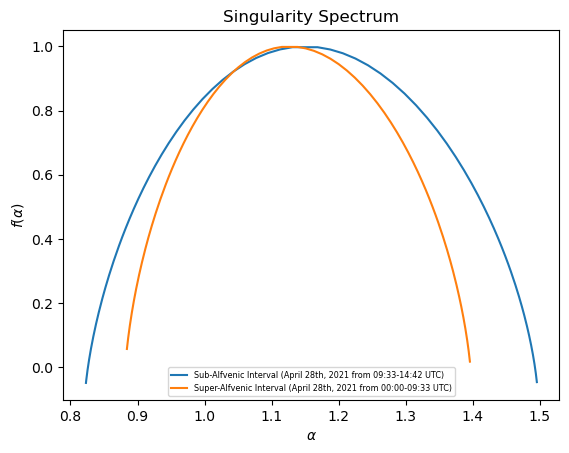

In [13]:
# Finally, from the Renyi exponents, find and plot the multifractal spectra:
alphaList1, mfList1 = MFDFAlib.mfSpec(tauFunc1, qList)
alphaList2, mfList2 = MFDFAlib.mfSpec(tauFunc2, qList)
#######PLOTTING##################
# Finally, plot the f(alpha) function
plt.plot(alphaList1, mfList1, label = 'Sub-Alfvenic Interval (April 28th, 2021 from 09:33-14:42 UTC)')
plt.plot(alphaList2, mfList2, label = 'Super-Alfvenic Interval (April 28th, 2021 from 00:00-09:33 UTC)')
plt.title('Singularity Spectrum')
plt.legend(fontsize = "xx-small")
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$f(\alpha)$')
plt.show()
#################################

#### Power Spectral Density

In [1]:
# Here we are calculating the PSD function of each data set:
# Choose 22 Hz as the sampling frequency, as in Gomes et al.
fs = 22 # Hz
fList1, PSDlist1 = MFDFAlib.PSDfunc(bmag_sub,fs)
fList2, PSDlist2 = MFDFAlib.PSDfunc(bmag_super,fs)
#######PLOTTING###################
plt.loglog(fList1,PSDlist1, label = 'Sub-Alfvenic Interval (April 28th, 2021 from 09:33-14:42 UTC)')
plt.loglog(fList2,PSDlist2, label = 'Super-Alfvenic Interval (April 28th, 2021 from 00:00-09:33 UTC)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Spectral Density [nt**2/Hz]')
##################################

NameError: name 'MFDFAlib' is not defined

### Shuffled Data

In [5]:
# First we use MFDFAlib to shuffle our time series intervals:
shuffled_sub = MFDFAlib.shuffle(bmag_sub)
shuffled_super = MFDFAlib.shuffle(bmag_super)


#### Fluctuation Function (Shuffled)

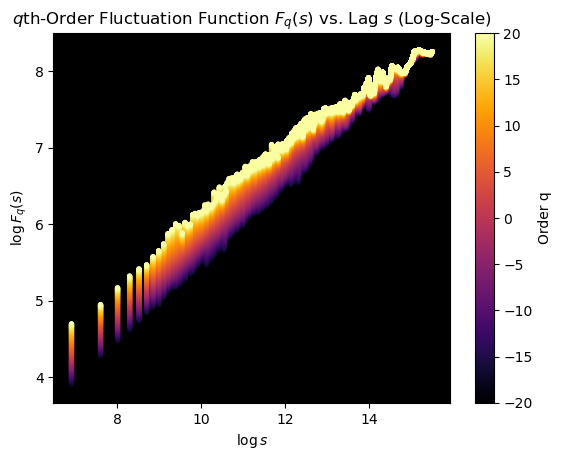

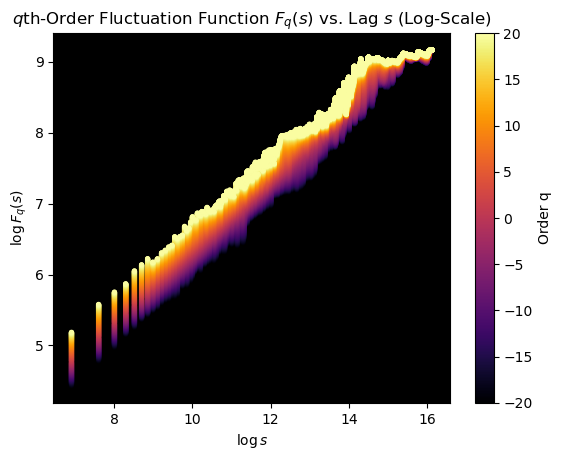

In [6]:
# Find the fluctuation function:
lag1,dfaList_shuf1 = MFDFAlib.flucFunc(shuffled_sub,lag1,qList,order)
lag2,dfaList_shuf2 = MFDFAlib.flucFunc(shuffled_super,lag2,qList,order)

#### Hurst Spectrum (Shuffled)

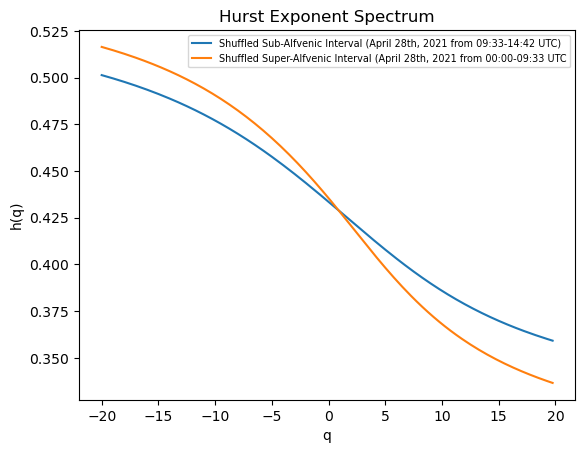

In [7]:
"""
 Hurst parameter spectra from each fluctuation function:
 Note : hList takes in the transpose of the fluctuation matrix,
 which is of the form: [[F_q1(s1),F_q1(s2), ...], [F_q2(s1),F_q2(s2), ...]]
 for the purpose of easily parsing the data  
"""
h_shuf1=MFDFAlib.hList(lag1,dfaList_shuf1.T)
h_shuf2=MFDFAlib.hList(lag2,dfaList_shuf2.T)
########PLOTTING#################
plt.plot(qList,h_shuf1,label="Shuffled Sub-Alfvenic Interval (April 28th, 2021 from 09:33-14:42 UTC)")
plt.plot(qList,h_shuf2,label="Shuffled Super-Alfvenic Interval (April 28th, 2021 from 00:00-09:33 UTC")
plt.ylabel('h(q)')
plt.xlabel('q')
plt.legend(fontsize = 'x-small')
plt.title('Hurst Exponent Spectrum')
plt.show()
#################################

#### Renyi Exponent Spectrum (Shuffled)

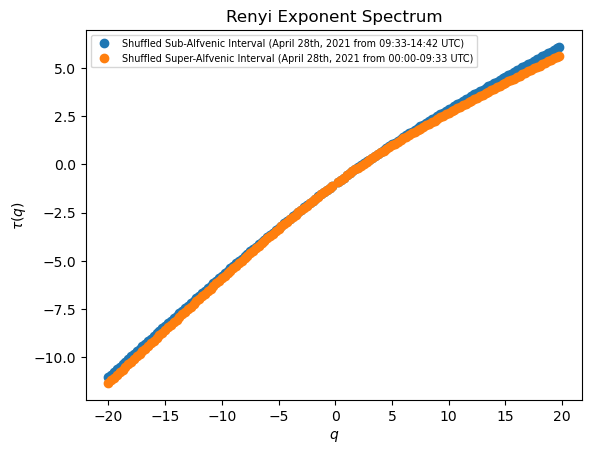

In [8]:
# Now find and plot the Renyi exponent spectrum from the Hurst spectrum:
tauFunc_shuf1=MFDFAlib.renyiExp(qList,h_shuf1)
tauFunc_shuf2=MFDFAlib.renyiExp(qList,h_shuf2)
########PLOTTING#################
plt.plot(qList,tauFunc_shuf1,'o',label = 'Shuffled Sub-Alfvenic Interval (April 28th, 2021 from 09:33-14:42 UTC)')
plt.plot(qList,tauFunc_shuf2,'o', label = 'Shuffled Super-Alfvenic Interval (April 28th, 2021 from 00:00-09:33 UTC)')
plt.xlabel(r'$q$')
plt.ylabel(r'$\tau(q)$')
plt.legend(fontsize = 'x-small')
plt.title('Renyi Exponent Spectrum')
plt.show()
#################################

#### Multifractal Spectrum (Shuffled)

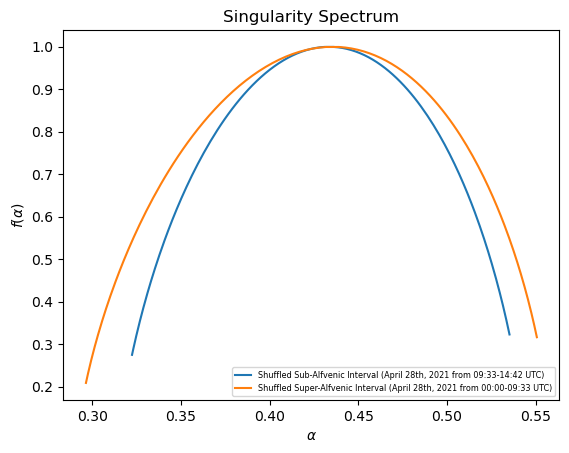

In [9]:
# Finally, from the Renyi exponents, find and plot the multifractal spectra:
alphaList_shuf1, mfList_shuf1 = MFDFAlib.mfSpec(tauFunc_shuf1, qList)
alphaList_shuf2, mfList_shuf2 = MFDFAlib.mfSpec(tauFunc_shuf2, qList)
#######PLOTTING##################
# Finally, plot the f(alpha) function
plt.plot(alphaList_shuf1, mfList_shuf1, label = 'Shuffled Sub-Alfvenic Interval (April 28th, 2021 from 09:33-14:42 UTC)')
plt.plot(alphaList_shuf2, mfList_shuf2, label = 'Shuffled Super-Alfvenic Interval (April 28th, 2021 from 00:00-09:33 UTC)')
plt.title('Singularity Spectrum')
plt.legend(fontsize = "xx-small")
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$f(\alpha)$')
plt.show()
#################################

#### Power Spectral Density (Shuffled)

Text(0, 0.5, 'Power Spectral Density [nt**2/Hz]')

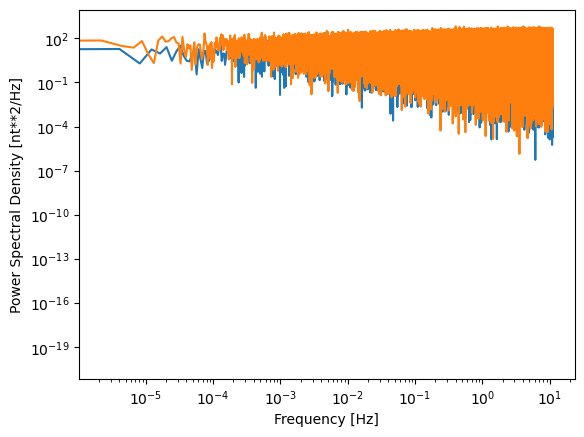

In [10]:
# Here we are calculating the PSD function of each data set:
# Choose 22 Hz as the sampling frequency, as in Gomes et al.
fs = 22 # Hz
fList_shuf1, PSDlist_shuf1 = MFDFAlib.PSDfunc(shuffled_sub,fs)
fList_shuf2, PSDlist_shuf2 = MFDFAlib.PSDfunc(shuffled_super,fs)
#######PLOTTING###################
plt.loglog(fList_shuf1,PSDlist_shuf1, label = 'Shuffled Sub-Alfvenic Interval (April 28th, 2021 from 09:33-14:42 UTC)')
plt.loglog(fList_shuf2,PSDlist_shuf2, label = 'Shuffled Super-Alfvenic Interval (April 28th, 2021 from 00:00-09:33 UTC)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Spectral Density [nt**2/Hz]')
##################################

### Full Domain Plot: 

22-Feb-25 16:37:35: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn/2021/
22-Feb-25 16:37:35: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021042800_v02.cdf
22-Feb-25 16:37:36: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021042806_v02.cdf
22-Feb-25 16:37:36: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021042812_v02.cdf
22-Feb-25 16:37:37: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021042818_v02.cdf
22-Feb-25 16:37:37: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021042900_v02.cdf
22-Feb-25 16:37:38: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021042906_v02.cdf
22-Feb-25 16:37:38: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021042912_v02.cdf
22-Feb-25 16:37:39: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021042918_v02.cdf
22-Feb-25 16:38:05: Downloading re

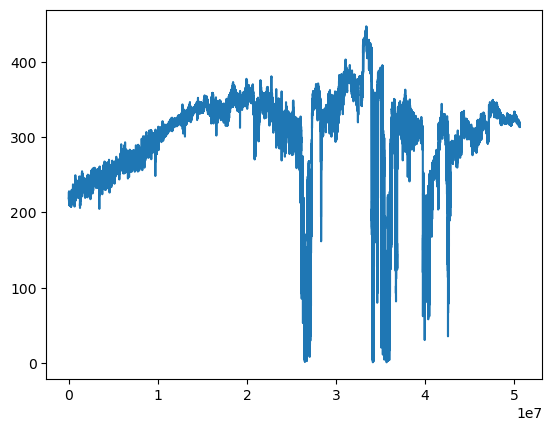

In [6]:
# Now let's choose the total time range to make sure we are plotting the right thing
totalTimeRange = ['2021-4-28/00:00','2021-4-30']

fields_vars = pyspedas.projects.psp.fields(trange=totalTimeRange, datatype='mag_rtn', level='l2', time_clip=True)
b_rtn_tot = pyspedas.get_data("psp_fld_l2_mag_RTN")
b_mag_tot = MFDFAlib.magnitude(b_rtn_tot.y)

#tplot('psp_fld_l2_mag_RTN')
plt.plot(b_mag_tot)